#**Part 1: Data Loading and Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the Dataset**

In [ ]:
food_data = pd.read_csv('onlinefoods.csv')
food_data.head()

#The dataset has been loaded and displayed

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


**2. Handle Missing Values**

Through Further data analysis, I found out that there is no missing values.

**3. Encode Categorical Variables**

The Categorical Variables was converted using different methods:

In [ ]:
#Label encoding
encoder = LabelEncoder()

food_data['Occupations'] = encoder.fit_transform(food_data['Occupation'])
food_data['Income'] = encoder.fit_transform(food_data['Monthly Income'])
food_data['Education'] = encoder.fit_transform(food_data['Educational Qualifications'])
food_data['Status'] = encoder.fit_transform(food_data['Marital Status'])

In [ ]:
#One-hot encoding
dummies = pd.get_dummies(food_data, drop_first=True)
dummies.head()

,Age,Family size,latitude,longitude,Pin code,Occupations,Income,Education,Status,Gender_Male,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,3,4,2,2,0,...,0,0,1,0,1,0,0,1,1,1
1,24,3,12.9770,77.5773,560009,3,2,0,2,0,...,1,0,0,0,0,0,0,1,1,1
2,22,3,12.9551,77.6593,560017,3,2,2,2,1,...,1,0,0,0,1,0,0,1,0,1
3,22,6,12.9473,77.5616,560019,3,4,0,2,0,...,0,0,1,0,0,0,0,1,1,1
4,22,4,12.9850,77.5533,560010,3,2,2,2,1,...,1,0,0,0,1,0,0,1,1,1


**4. Feature Selection**

In [ ]:
X = dummies[['Age', 'Gender_Male','Status',	'Occupations', 'Income', 'Education','Family size','Pin code','Output_Yes' ]]
y = dummies['Feedback_Positive']

#Variables X contains all the selected features while variable y contains the target variable

# **Part 2: Exploratory Data Analysis (EDA)**

**1. Descriptive Statistics**

In [ ]:
X.describe()

,Age,Gender_Male,Status,Occupations,Income,Education,Family size,Pin code,Output_Yes
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.572165,1.412371,1.902062,2.713918,1.069588,3.280928,560040.113402,0.775773
std,2.975593,0.495404,0.895035,1.329722,1.491790,1.035695,1.351025,31.399609,0.417611
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,560001.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,560010.750000,1.000000
50%,24.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,560033.500000,1.000000
75%,26.000000,1.000000,2.000000,3.000000,4.000000,2.000000,4.000000,560068.000000,1.000000
max,33.000000,1.000000,2.000000,3.000000,4.000000,4.000000,6.000000,560109.000000,1.000000


**2. Visualizations**

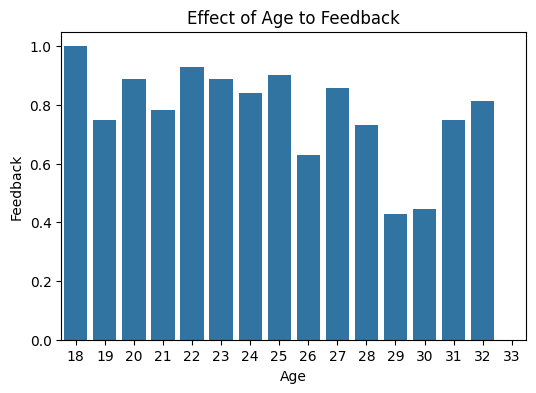

In [ ]:
plt.figure(figsize = (6, 4))
sns.barplot(x='Age', y='Feedback_Positive', data=dummies, errorbar = None)
plt.title('Effect of Age to Feedback')
plt.xlabel('Age')
plt.ylabel('Feedback')
plt.show()

<ipython-input-197-bd29142d0007>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(proportions.columns, labels=['Positive' if col == 1 else 'Negative' for col in proportions.columns])


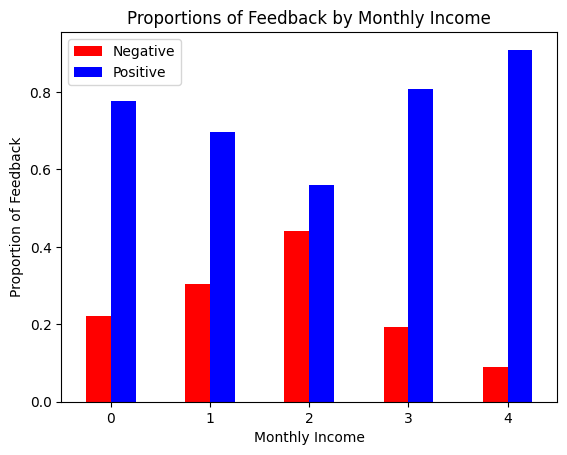

In [ ]:
proportions = dummies.groupby('Income')['Feedback_Positive'].value_counts(normalize=True).unstack()

proportions.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Monthly Income')
plt.ylabel('Proportion of Feedback')
plt.title('Proportions of Feedback by Monthly Income')
plt.legend(proportions.columns, labels=['Positive' if col == 1 else 'Negative' for col in proportions.columns])
plt.xticks(rotation=0)
plt.show()

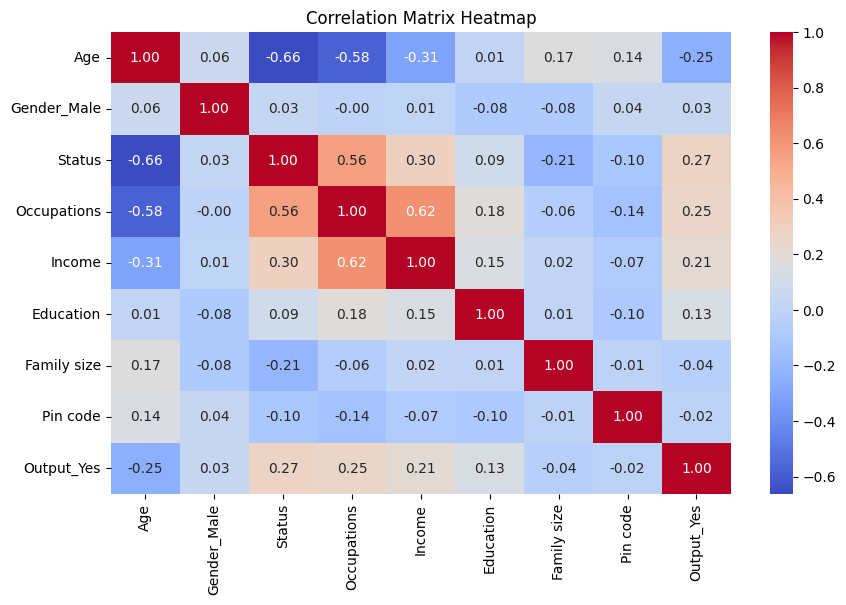

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

**1. Build the Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

**2. Model Evaluation**

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 0.8589743589743589
Precision: 0.9242424242424242
Recall: 0.9104477611940298
Confusion Matrix: 
[[ 6  5]
 [ 6 61]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.92      0.91      0.92        67

    accuracy                           0.86        78
   macro avg       0.71      0.73      0.72        78
weighted avg       0.86      0.86      0.86        78



# **Part 4: Data Analysis and Visualization**

**1. Feature Importance**

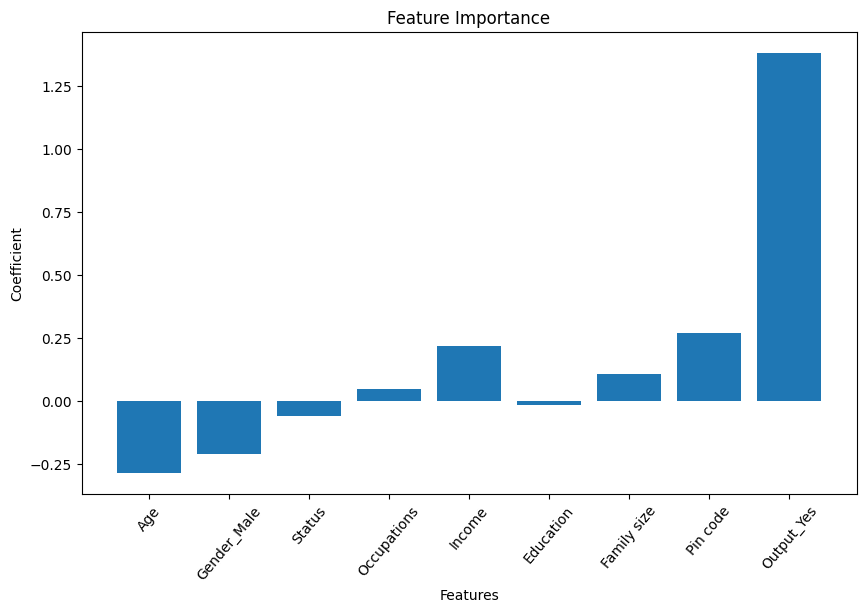

In [ ]:
feature_importance = model.coef_[0]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=50)
plt.show()

**2. Prediction Insights**

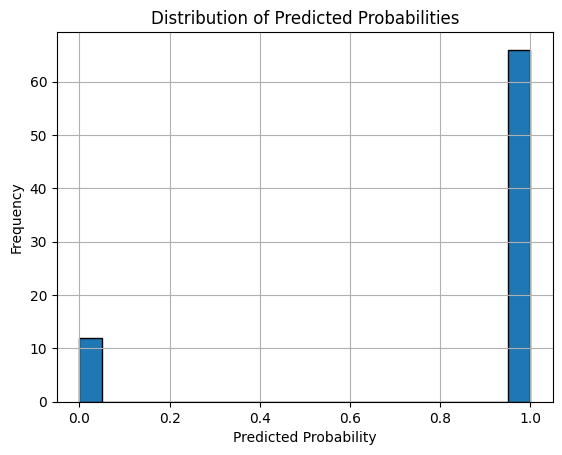

In [ ]:
plt.hist(y_pred, bins=20, edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid(True)
plt.show()